Então eu tenho um modelo financeiro em que eu tenho uma série temporal e vários fundos de investimento em que os clientes podem aportar ou não dependendo os valores de performance desses fundos e eu quero calcular a importância desses valores, como que eu faço isso? qual é o modelo python em que eu posso ter sei lá, valores mês a mês de várias janelas de performance do fundo e calcular temporalmente qual é o valor que o cliente considerou o mais importante para manter o fundo na carteira, e quando eu falo manter é o valor financeiro maior que ele aloca no fundo, qual é o modelo?


### GPT 4

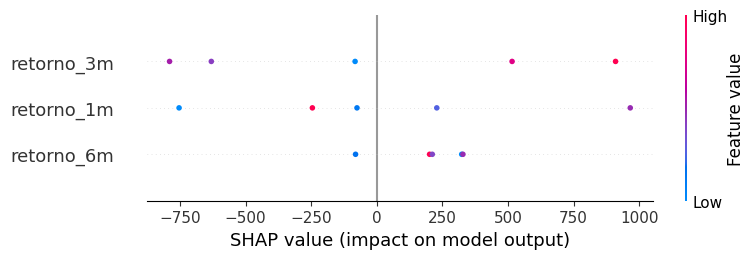

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap

# Exemplo de dados
df = pd.DataFrame({
    'data': pd.date_range(start='2020-01-01', periods=24, freq='M'),
    'fundo_id': np.random.choice(['Fundo A', 'Fundo B'], size=24),
    'retorno_1m': np.random.uniform(-0.05, 0.05, size=24),
    'retorno_3m': np.random.uniform(-0.10, 0.10, size=24),
    'retorno_6m': np.random.uniform(-0.15, 0.15, size=24),
    'alocacao': np.random.uniform(1000, 10000, size=24)
})

# Features e Target
X = df[['retorno_1m', 'retorno_3m', 'retorno_6m']]
y = df['alocacao']

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Feature Importance com SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Visualização
shap.summary_plot(shap_values, X_test)